# House Prices Prediction EDA  and Regression Algorithms

**In this kernel, I have just explored the data and implemented some basic regression technique with out doing any parameter tuning or major data manipulation.**   
** Credit : [Shanthosh Sharma](https://www.kaggle.com/sharmasanthosh/allstate-claims-severity/exploratory-study-on-ml-algorithms) **

## Data Exploration

- ** Shape of the dataframe**  
- ** Skewness of data**  
- ** Seperate numeric and categorical Data**

## Data Visualization

- ** Visualize univariate distribution using Violin Plots **  
- ** Make a list of top correlated feature **  
- ** Visualize relation between top correlated features **

## Regression Algorithms

In [1]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Trian and Test Data
house_price = pd.read_csv("input/train.csv") 
house_id= house_price.Id
house_test = pd.read_csv("input/test.csv")
house_test_id = house_test.Id

# Drop house ID inplace
house_price.drop("Id",1,inplace=True)
house_test.drop("Id",1,inplace=True)

# check the dimension of the dataframe
print(house_price.shape)
print(house_test.shape)

# A glance at the dataframe
house_price.head()

(1460, 80)
(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Look at the skewness of the data
house_price.skew()
# Miscval is variable with the highest skewness
# we can apply the log1p to reduce the skewness

MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

In [4]:
# Check the number of columns of specific data type
print(house_price.dtypes.value_counts())

object     43
int64      34
float64     3
dtype: int64


In [5]:
# Make a new dataframe containing only numeric data columns

numeric_feature = [a for a in range(len(house_price.dtypes)) if house_price.dtypes[a] in ['int64','float64']]
numeric_fet_test = [a for a in range(len(house_test.dtypes)) if house_test.dtypes[a] in ['int64','float64']]
numeric_data = house_price.iloc[:,numeric_feature]
numeric_test = house_test.iloc[:,numeric_fet_test]

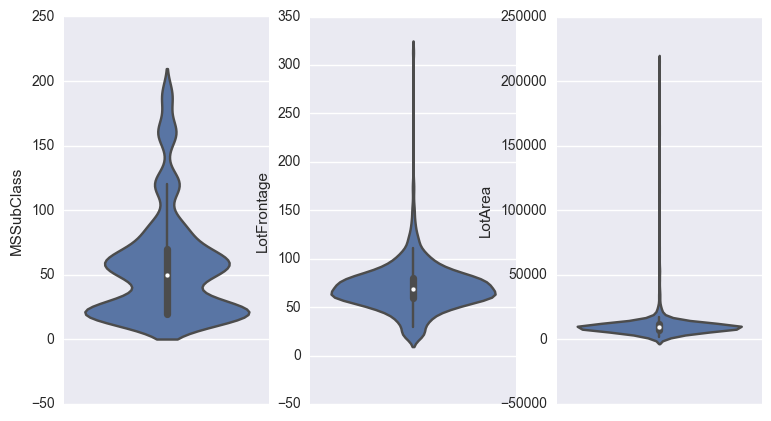

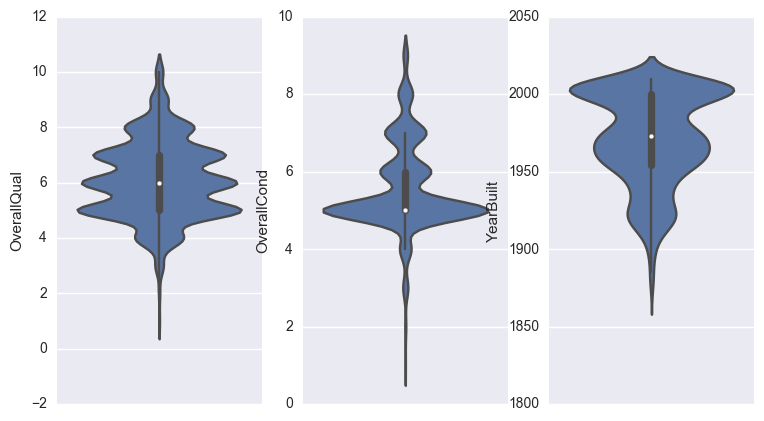

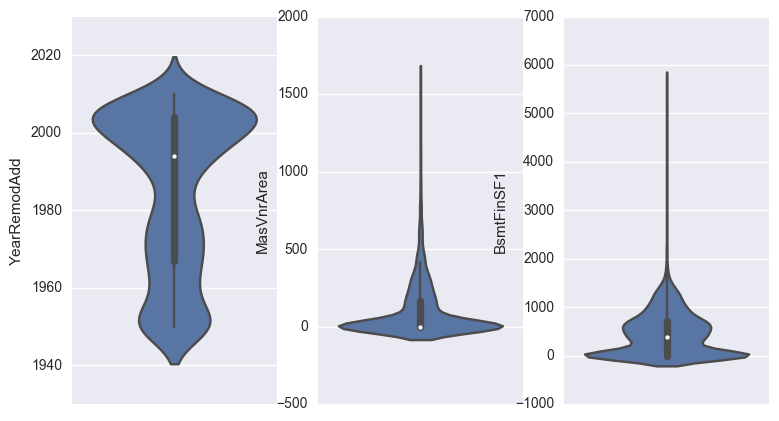

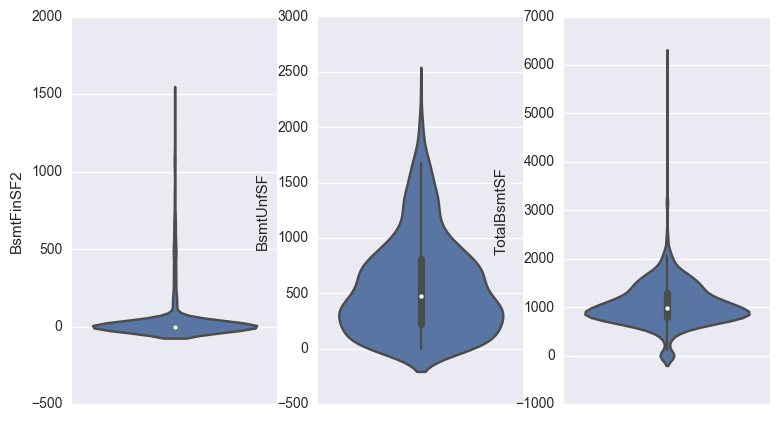

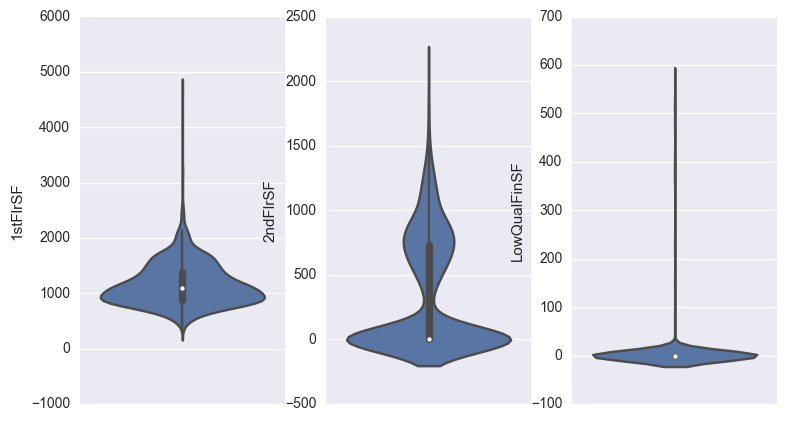

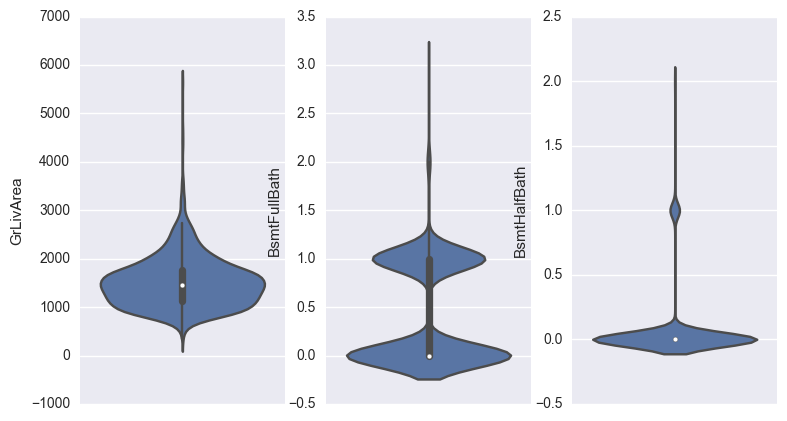

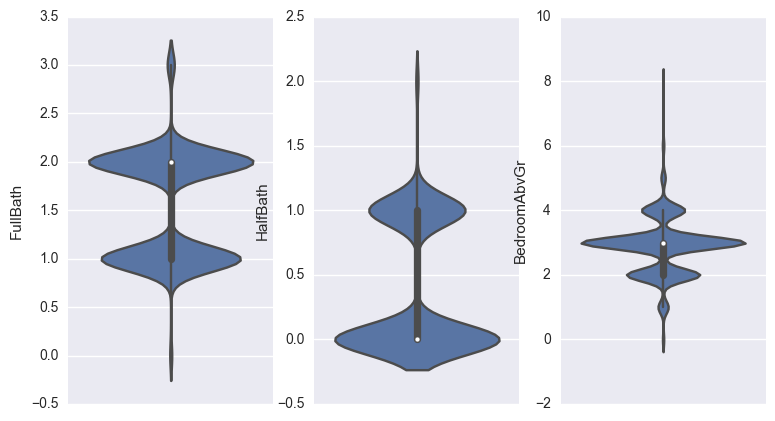

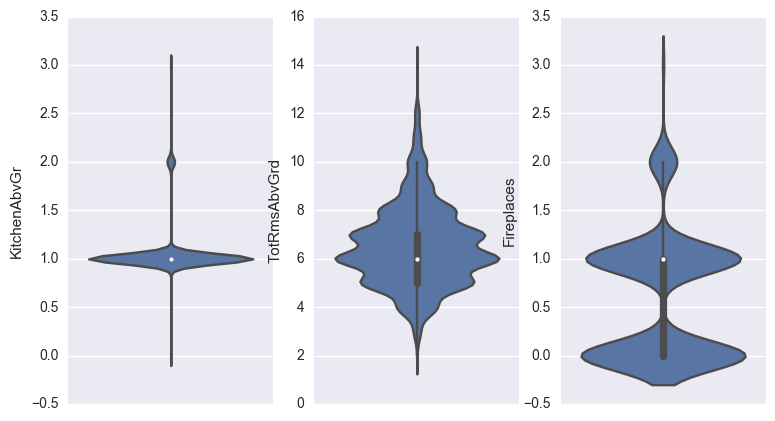

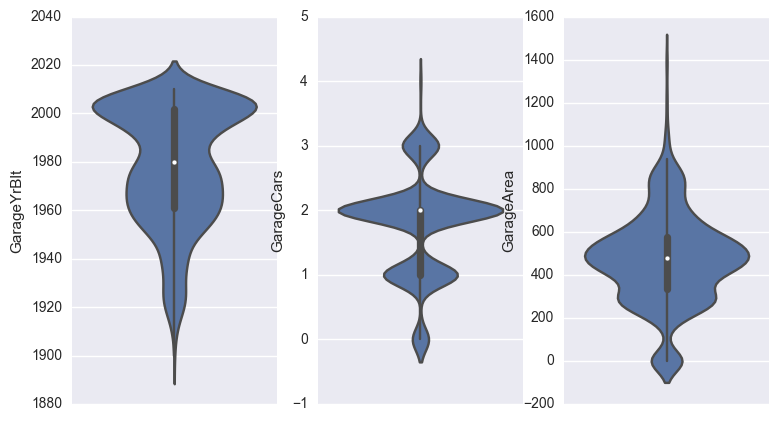

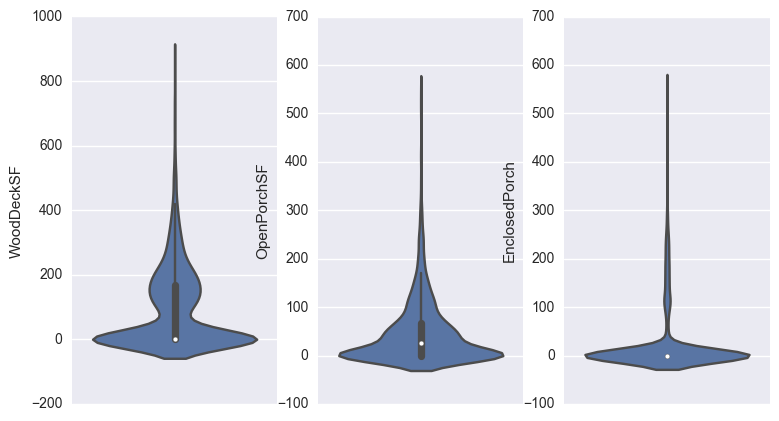

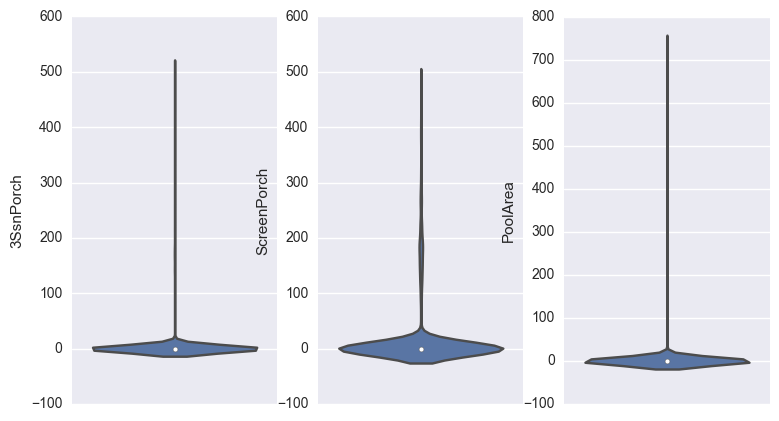

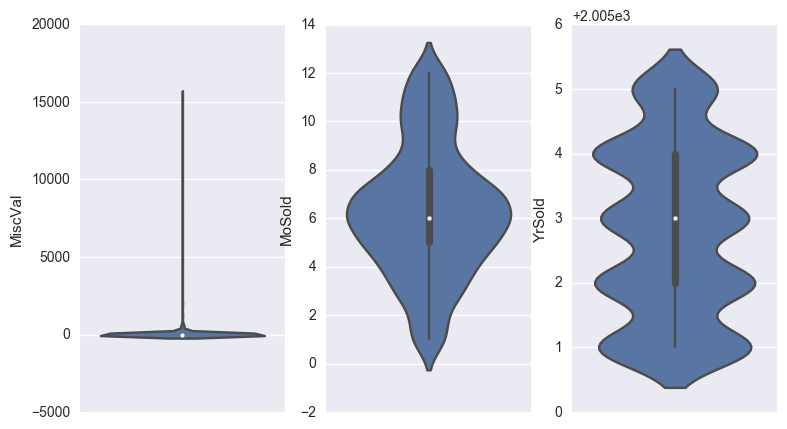

In [9]:
# Make the violin plots to check the distribution of every column
# Violin plots are just like box plots, but it tells you more about density which box plots do not.
# Here, you can see the multimodal distribution of the data

ncol = 3
nrow = 12
for i in range(nrow):
    fg,ax=plt.subplots(nrows=1,ncols=ncol,figsize=(9,5))
    for j in range(ncol):
        sns.violinplot(y = numeric_data.iloc[:,(i*ncol+j)],ax=ax[j])

In [10]:
# finding the best correlated features among all features,
# we are keeping the threshold 0.5 to limit the number of features
correlation = numeric_data.corr().abs()
correlation = pd.DataFrame(np.triu(correlation))
high_correlated = correlation.stack().sort_values(kind='quicksort')
high_correlated = high_correlated[(high_correlated >= 0.5)&(high_correlated<1)]
high_cor_column =  high_correlated.index.values

/Users/Krunal/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


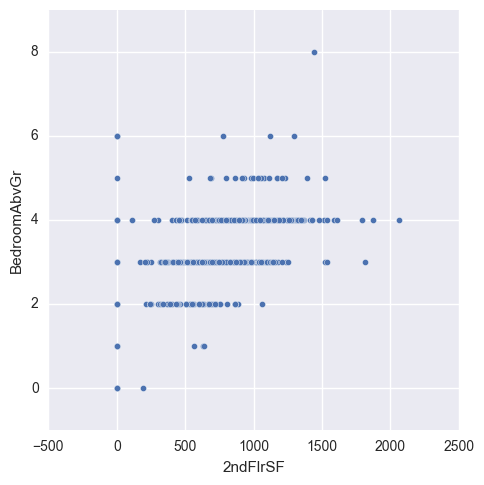

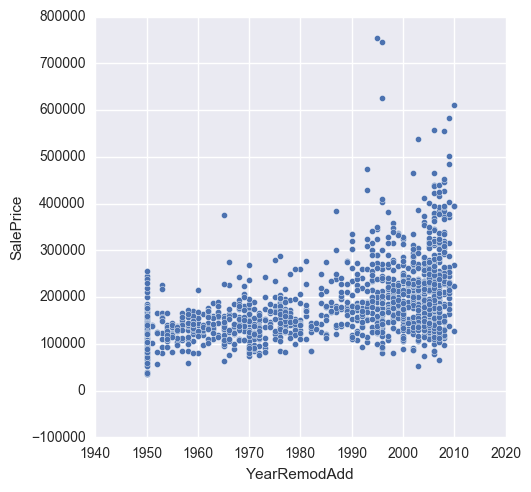

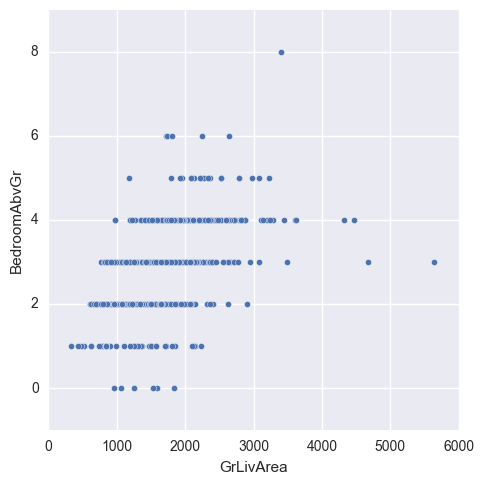

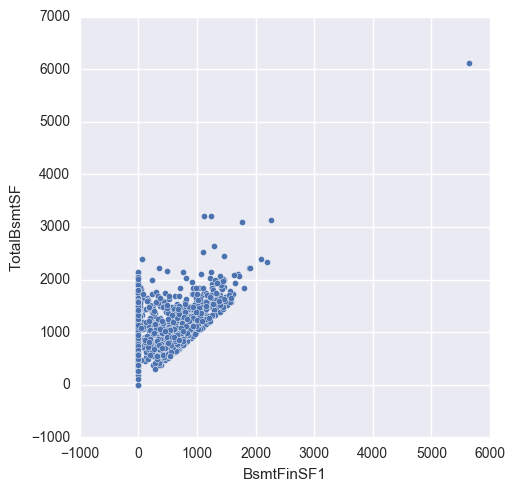

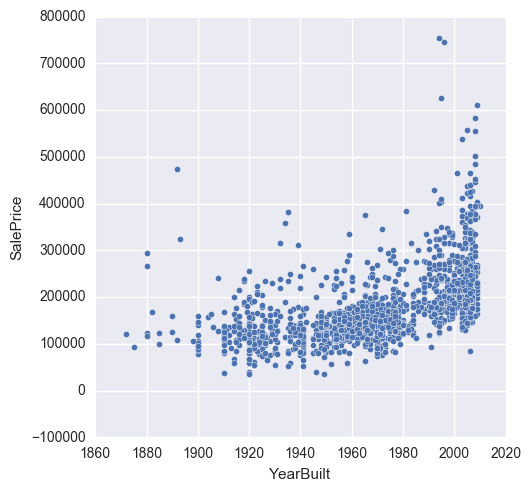

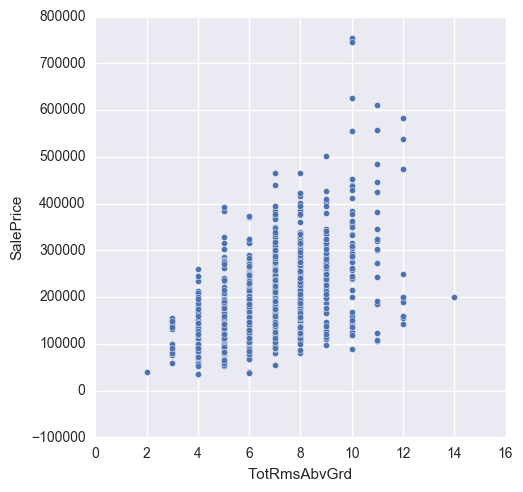

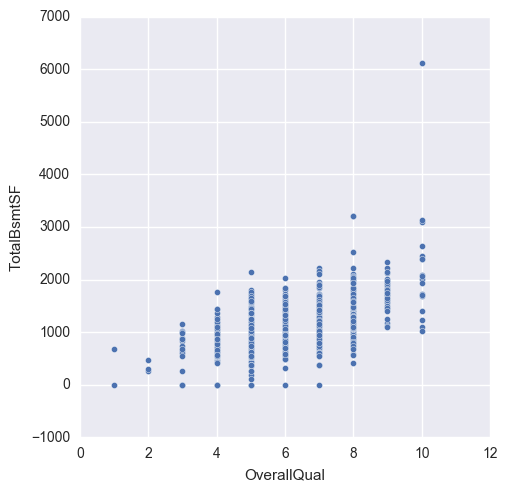

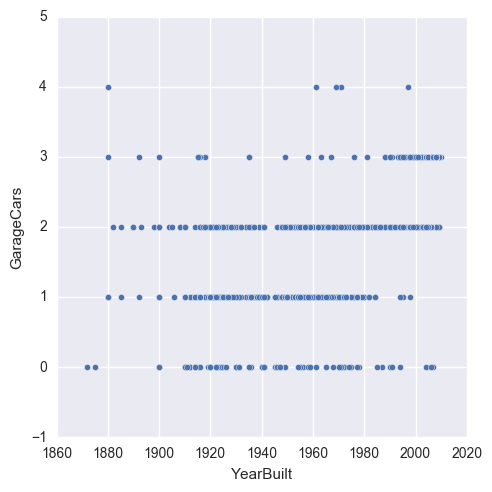

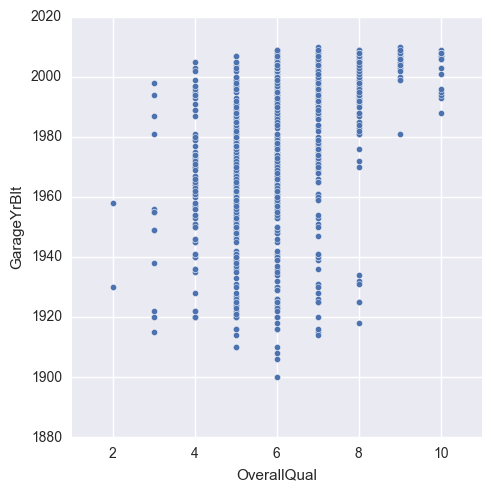

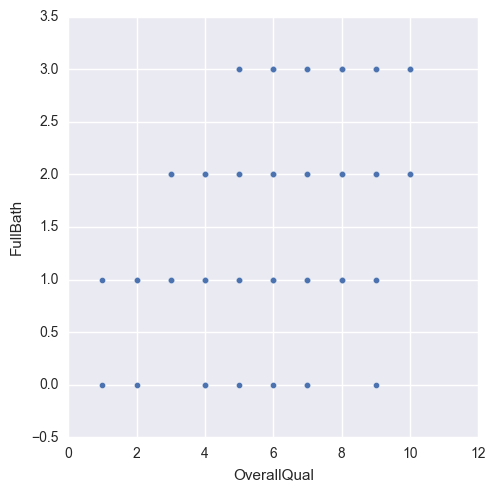

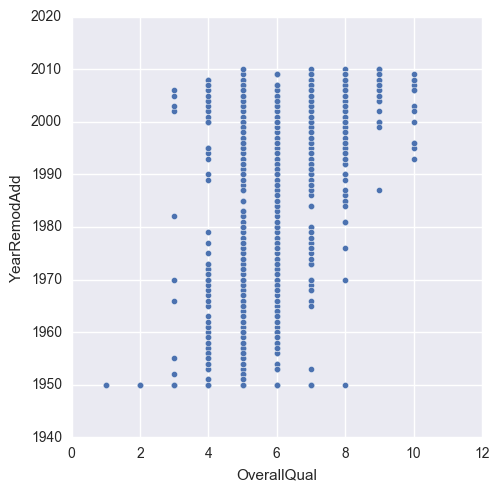

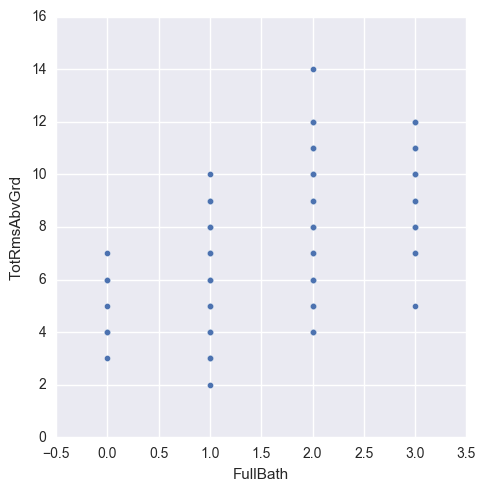

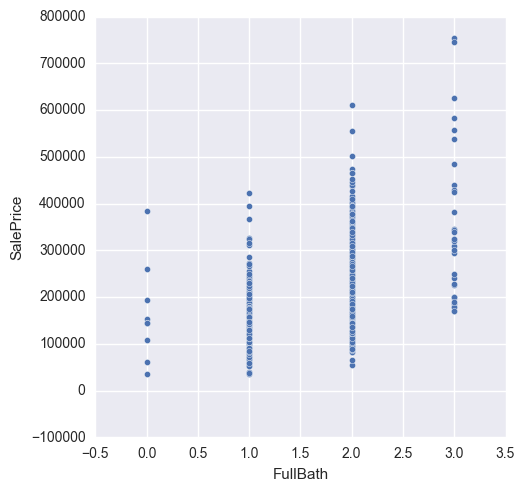

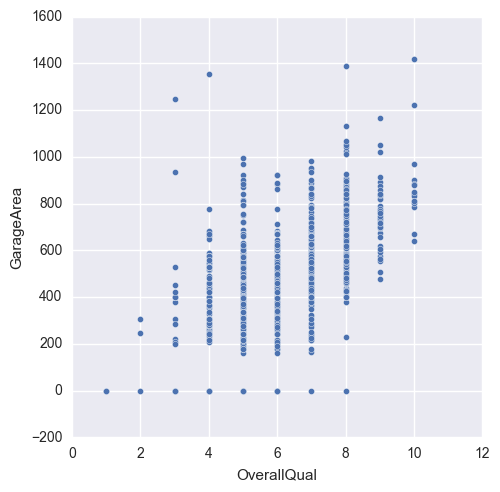

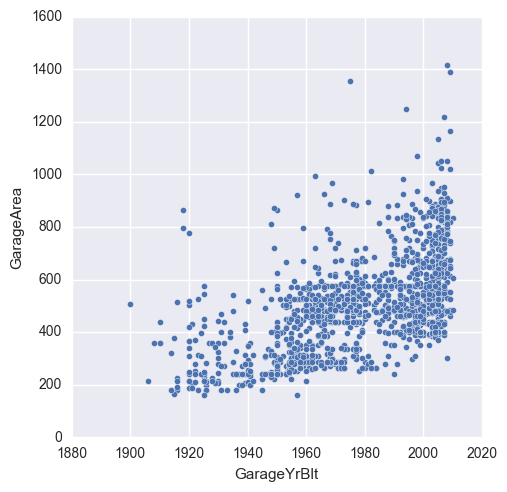

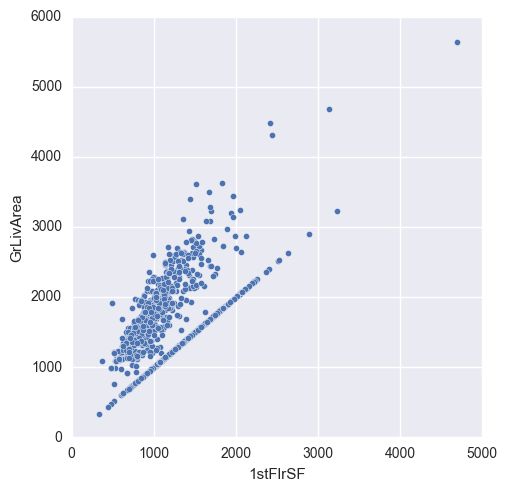

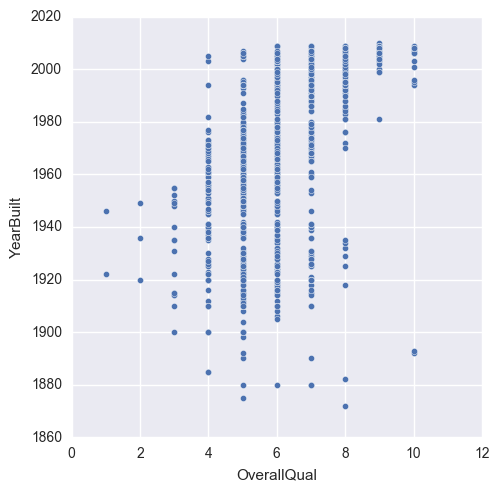

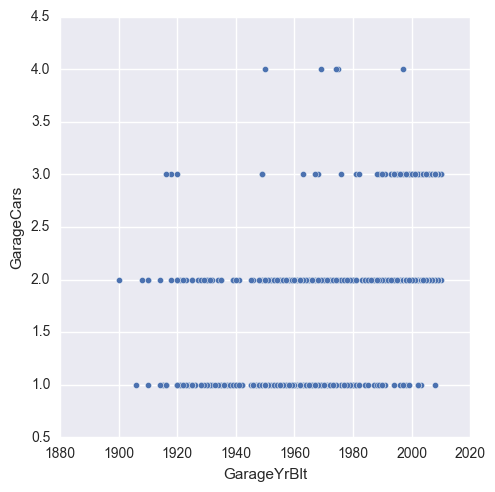

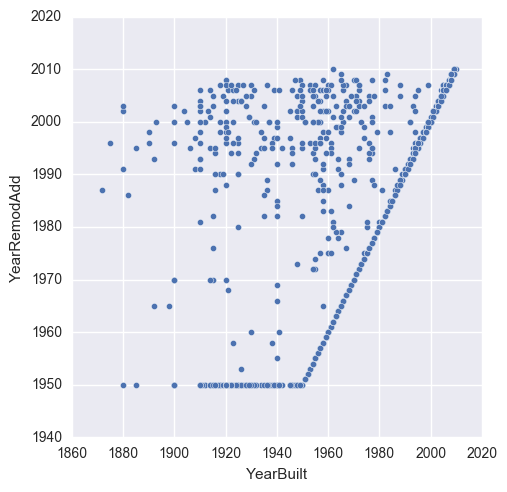

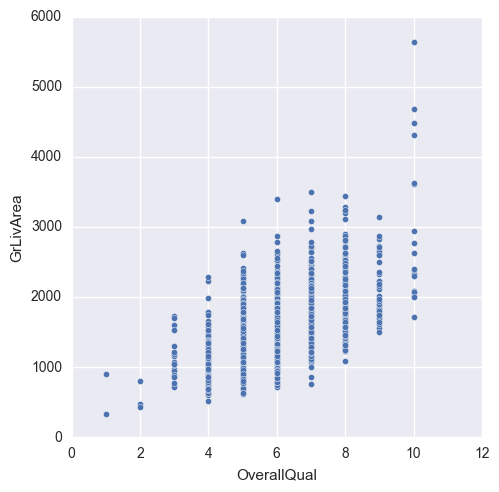

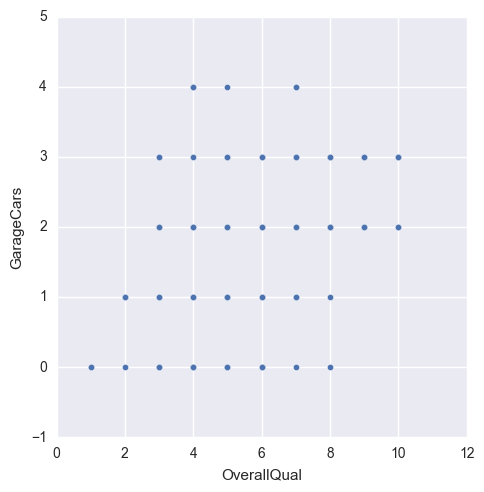

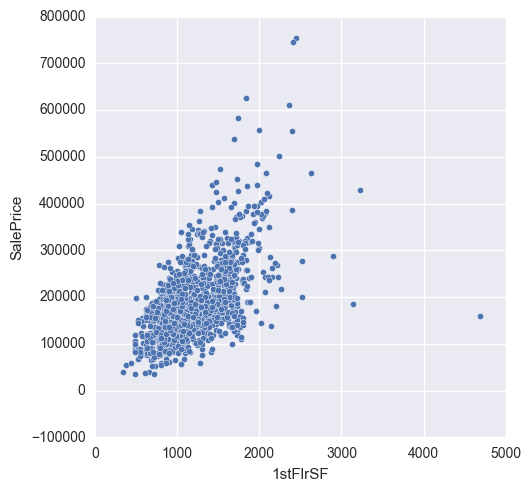

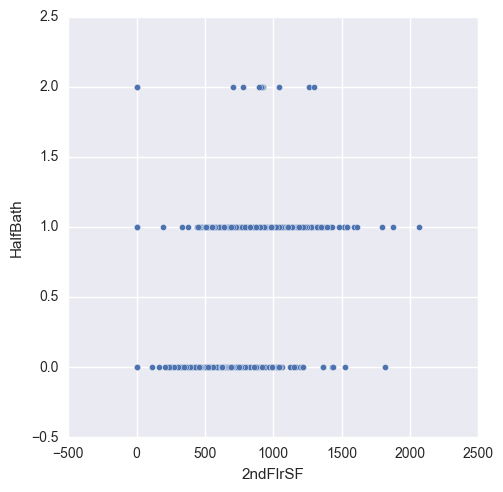

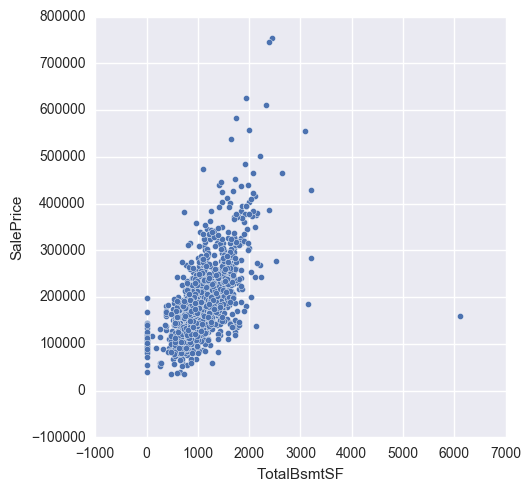

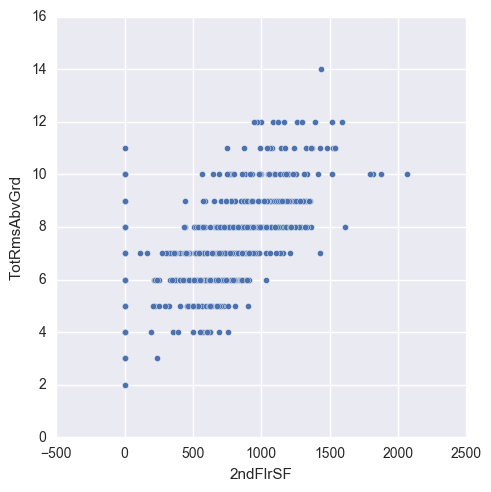

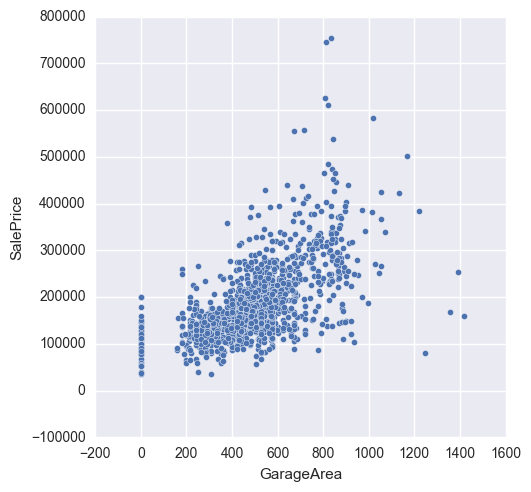

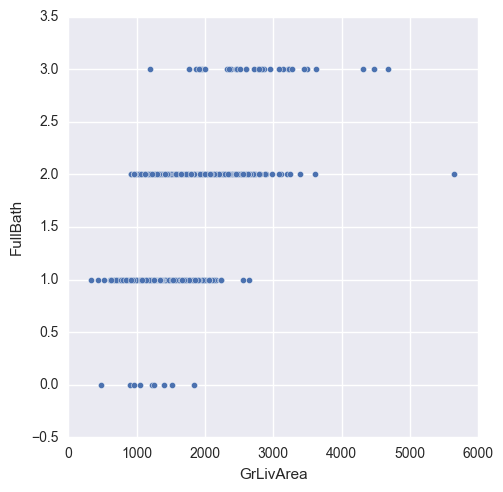

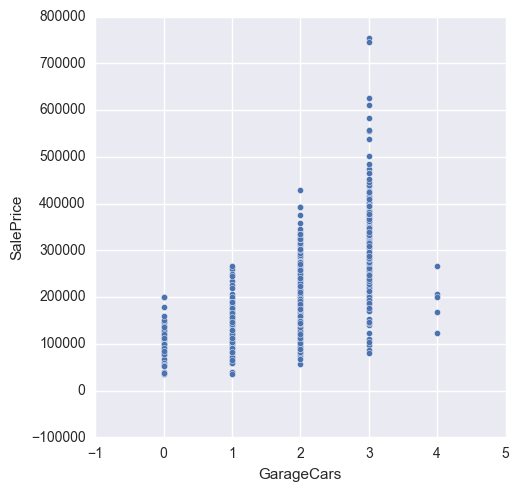

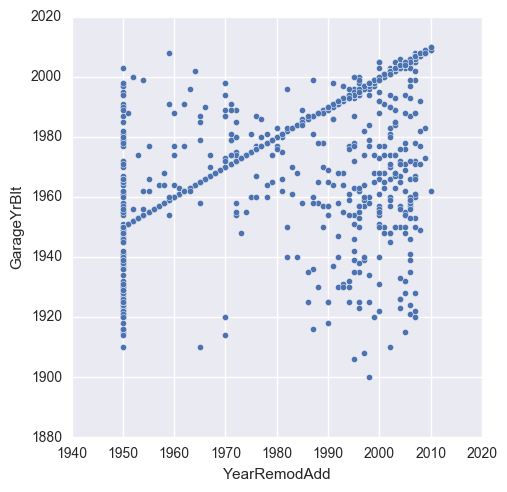

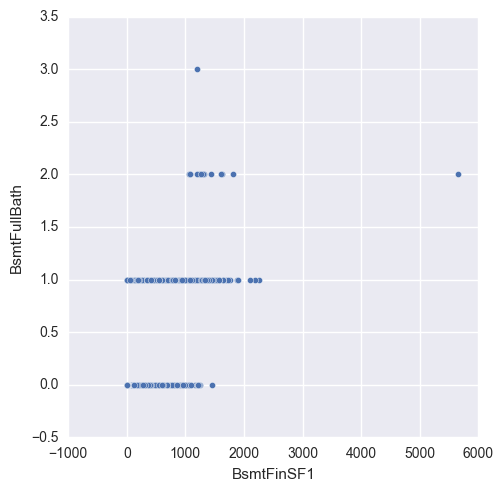

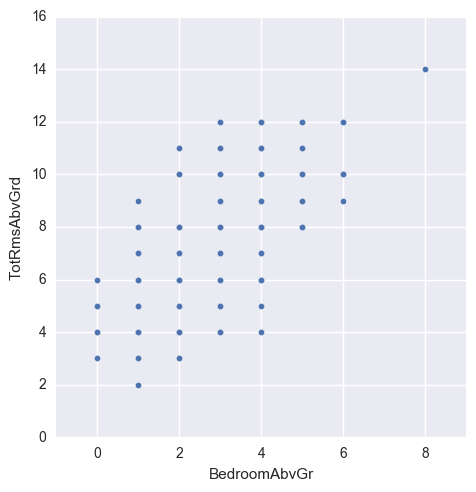

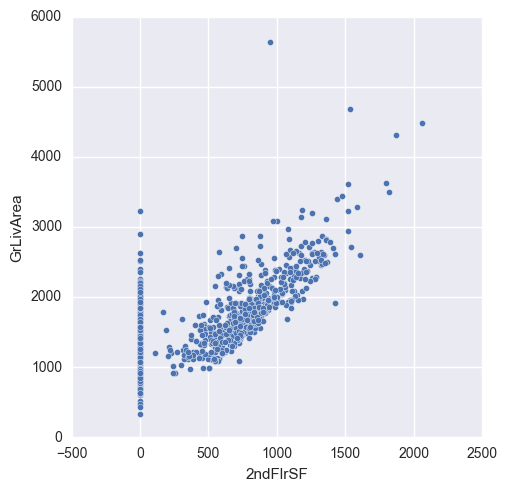

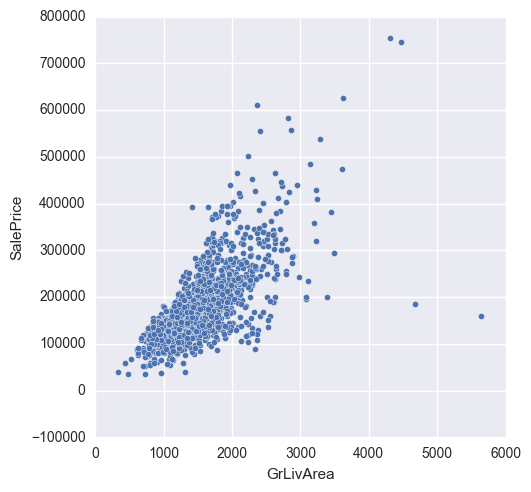

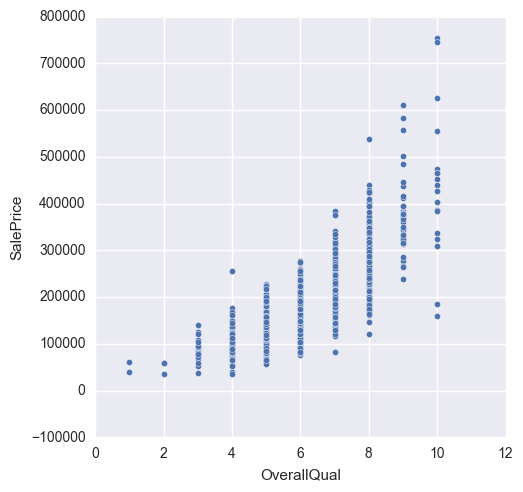

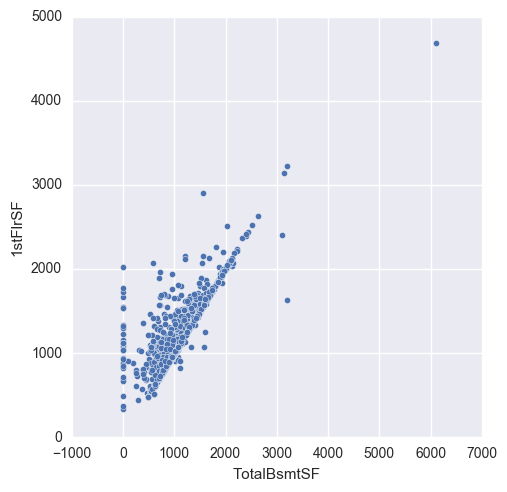

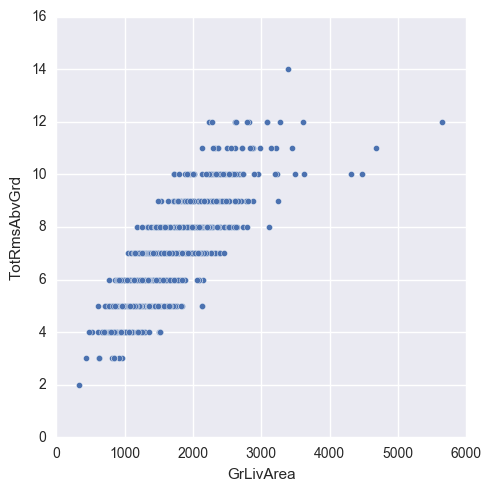

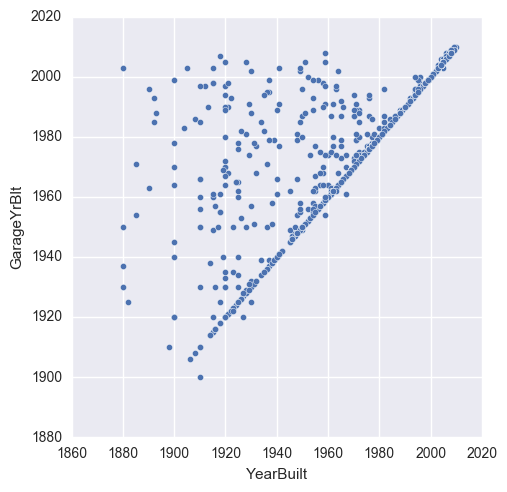

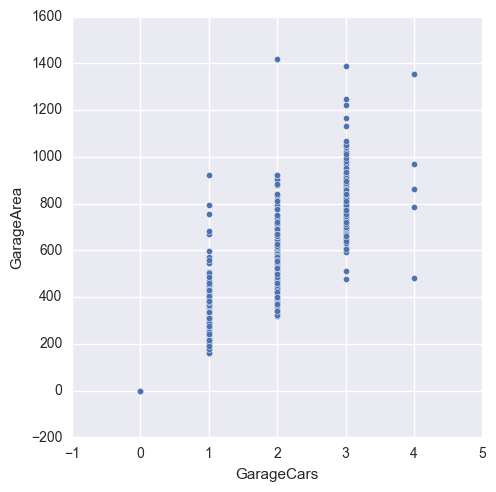

In [8]:
# Visualize scatter plot for top correlated features
x_col=[]
y_col =[]
for i in range(len(high_cor_column)):
    x_col.append(numeric_data.columns[high_cor_column[i][0]])
    y_col.append(numeric_data.columns[high_cor_column[i][1]])
for i in range(nrow):
    fg,ax=plt.subplots(nrows=1,ncols=ncol,figsize=(9,5))
    for j in range(ncol):
        sns.regplot(x=x_col[i*ncol+j],y=y_col[i*ncol+j],data=numeric_data,ax = ax[j],fit_reg=False)

In [9]:
# Make different data frame for the category data in train and test
cat_name = house_price.columns.difference(house_price.columns[numeric_feature])
cat_data = house_price.ix[:,cat_name]
cat_name_test = house_test.columns.difference(house_test.columns[numeric_fet_test])
cat_test = house_price.ix[:,cat_name_test]

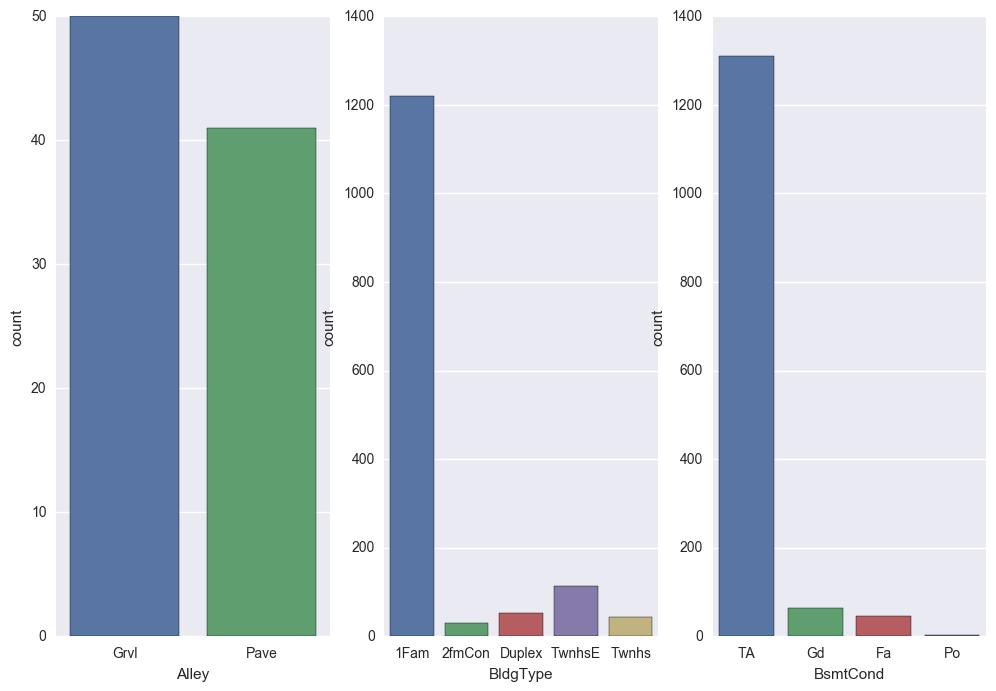

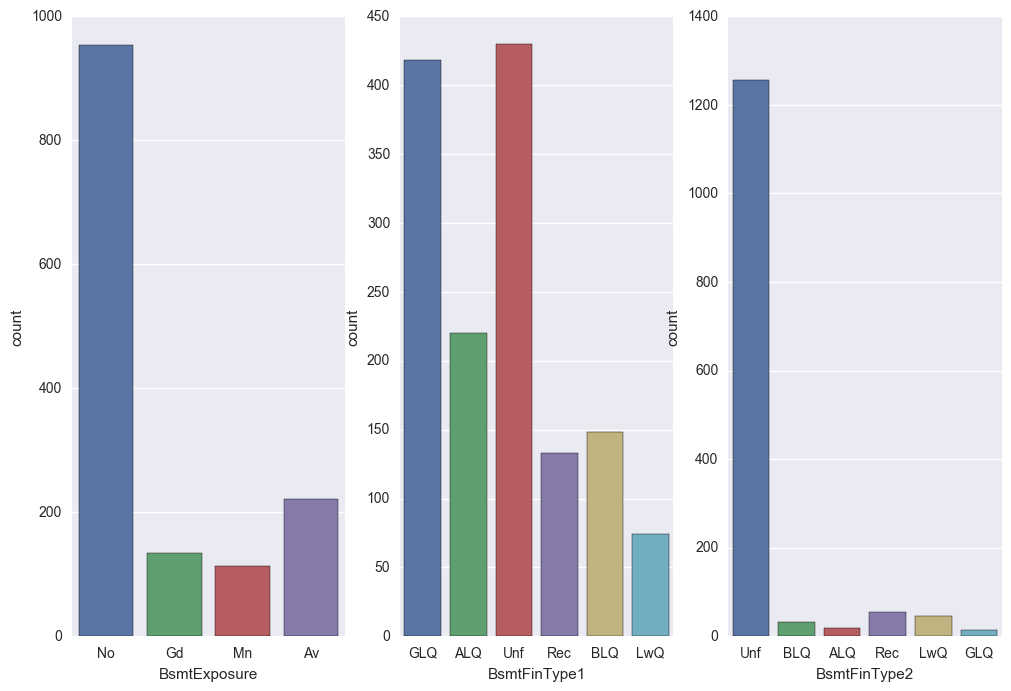

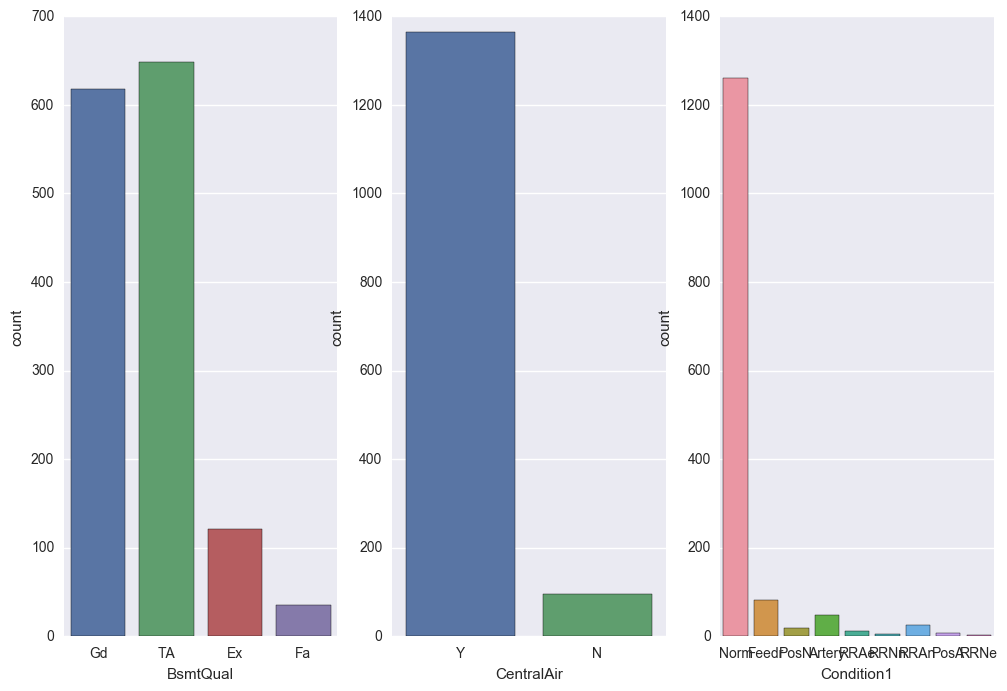

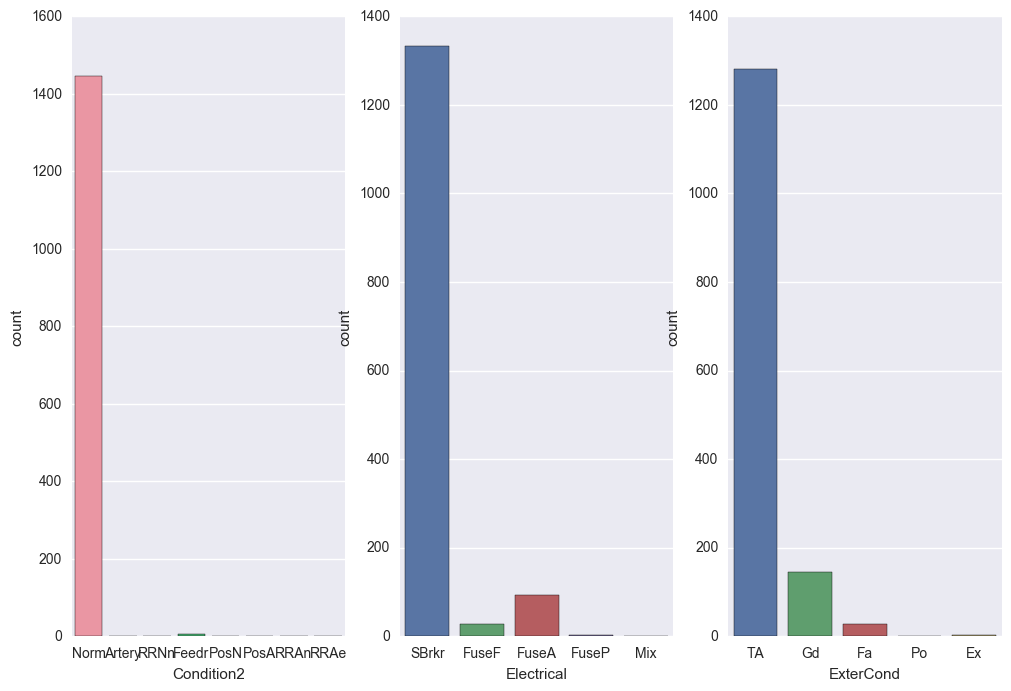

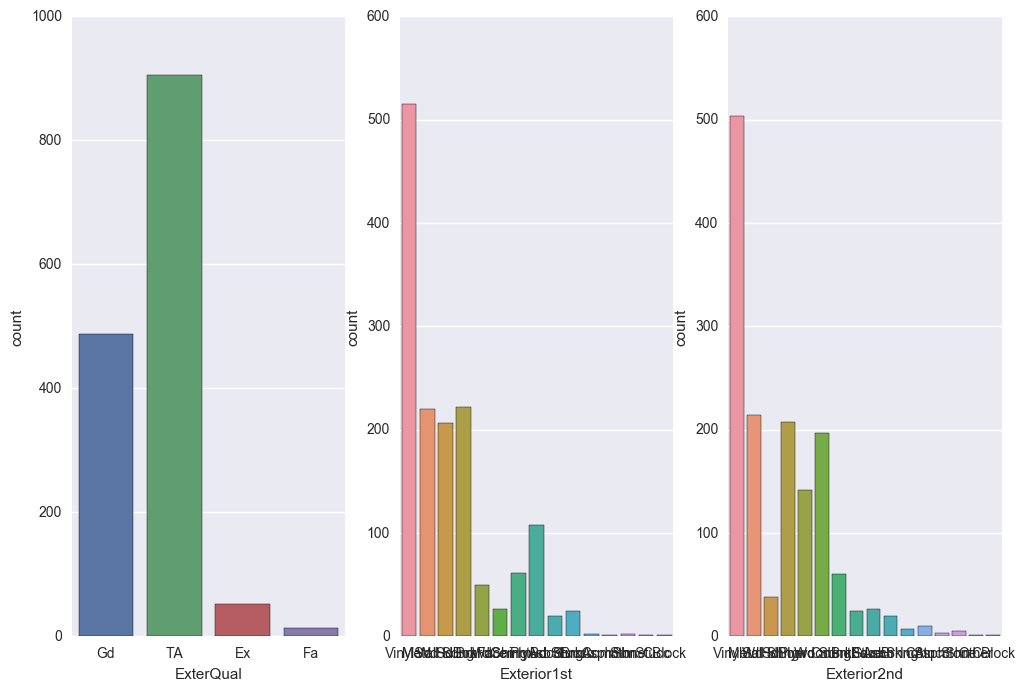

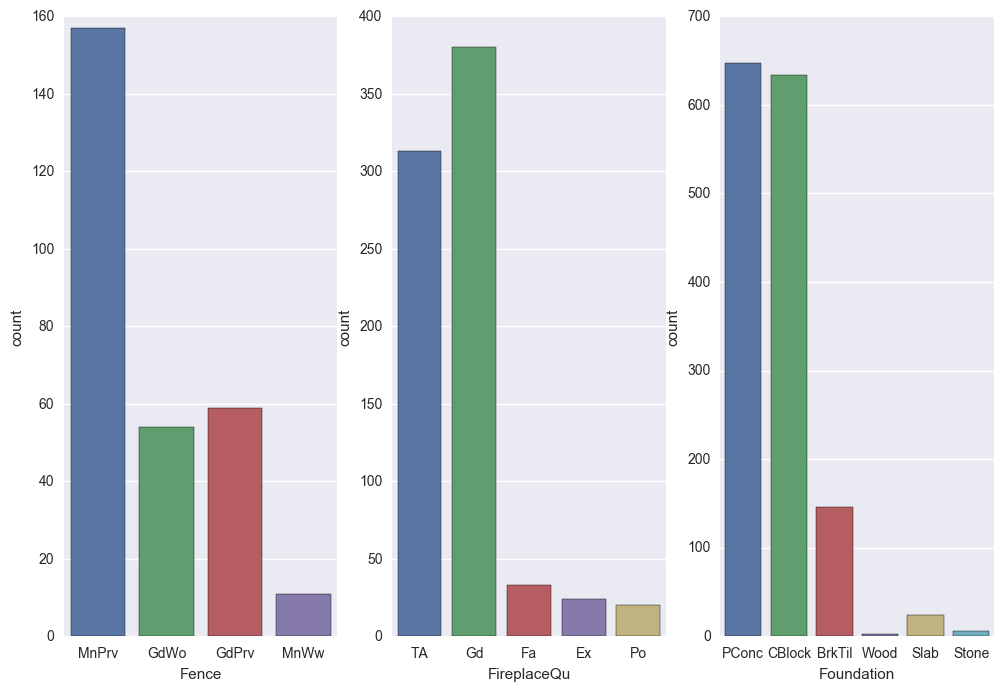

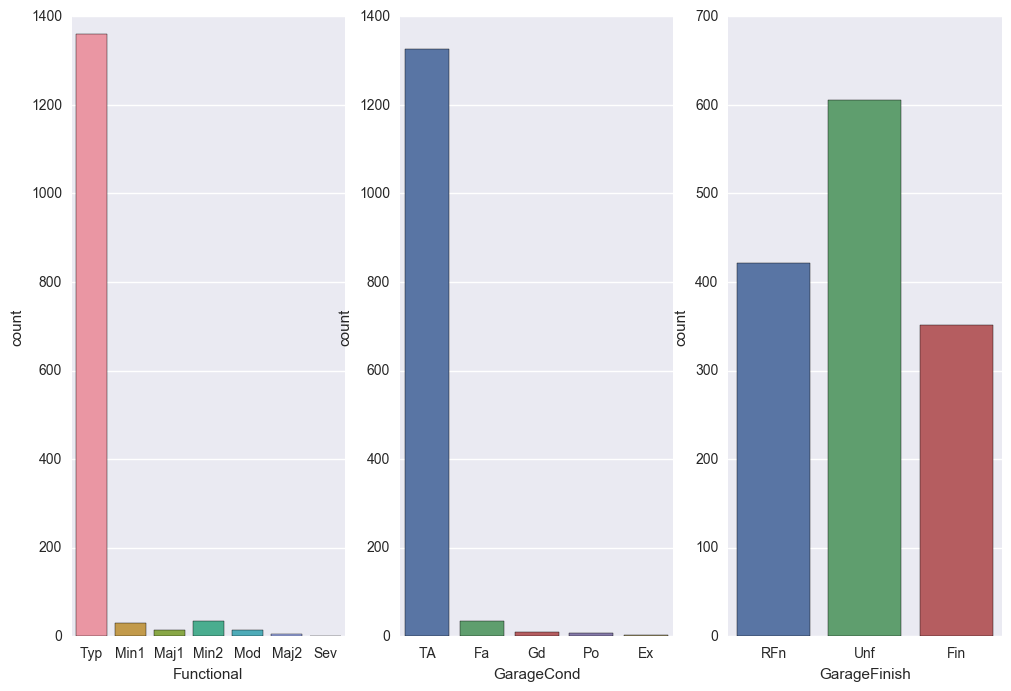

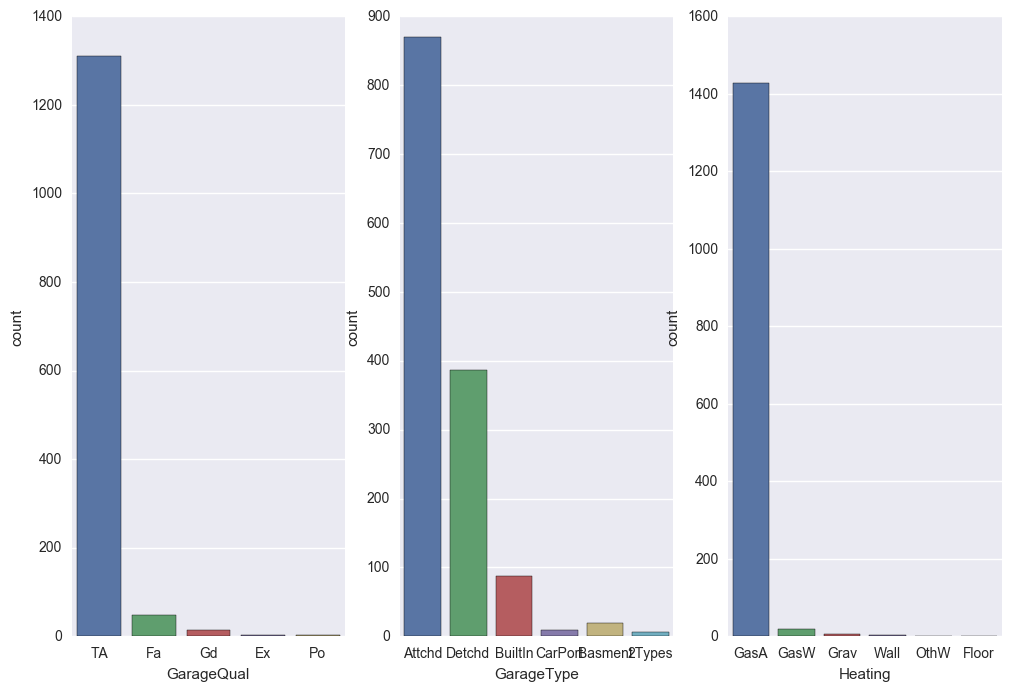

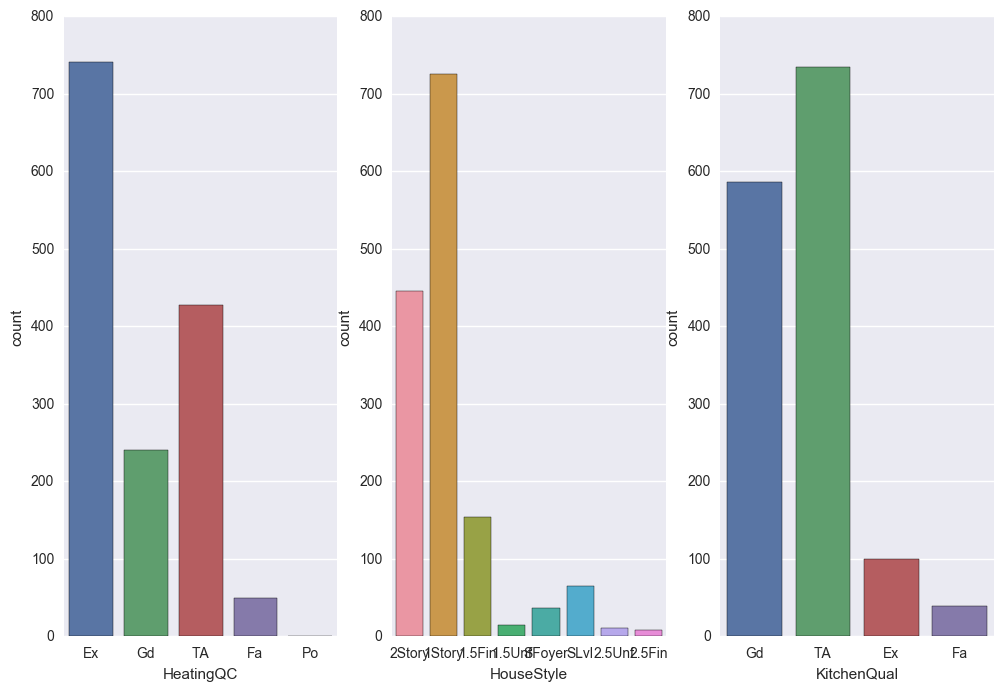

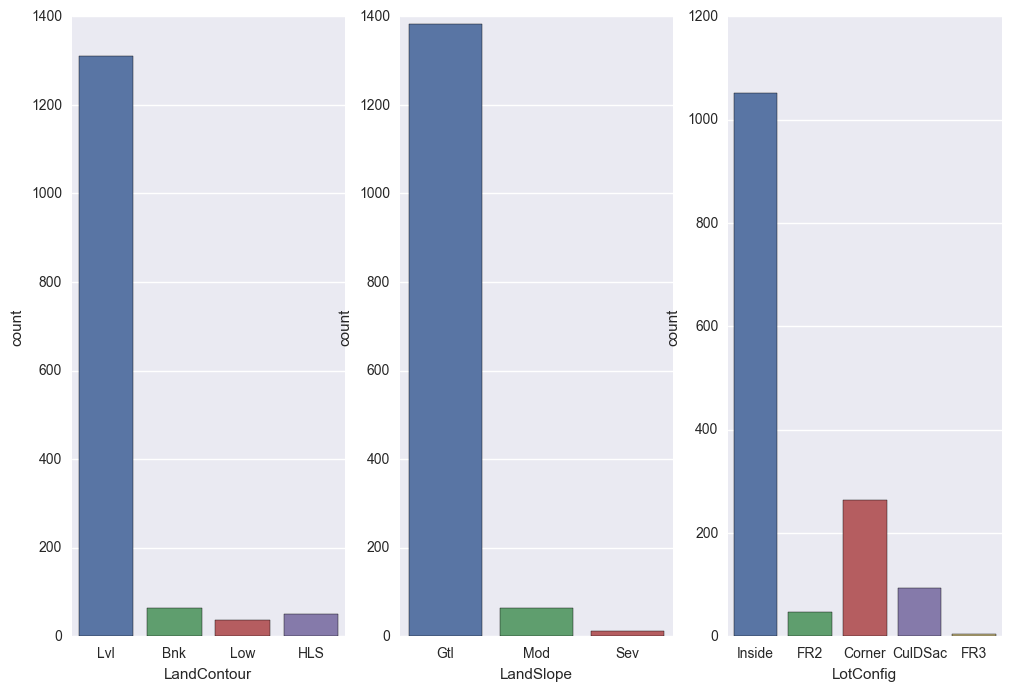

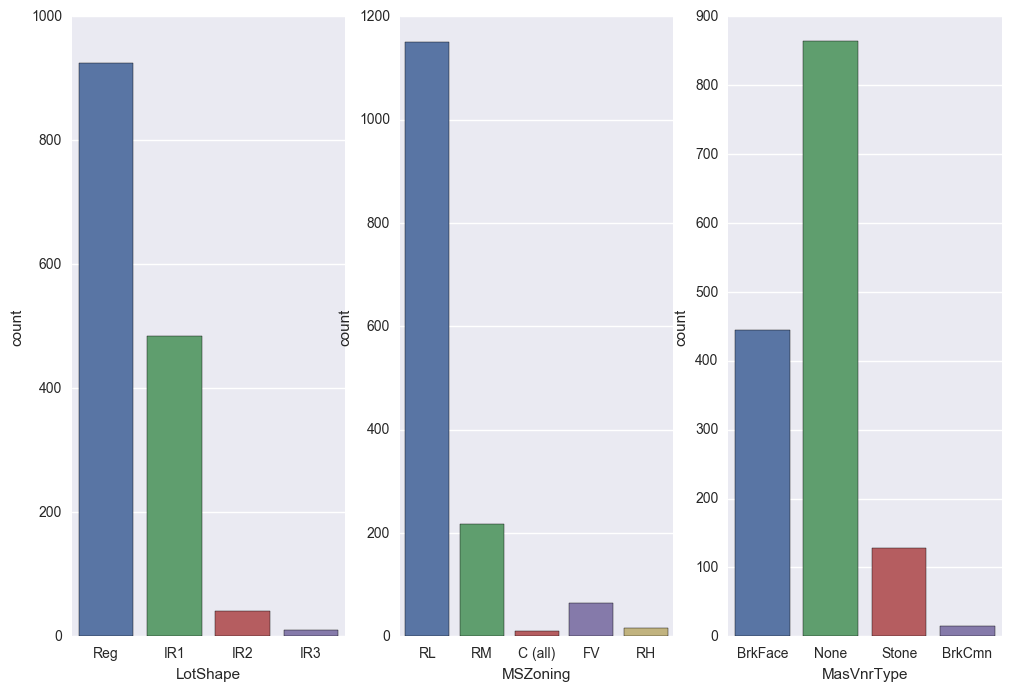

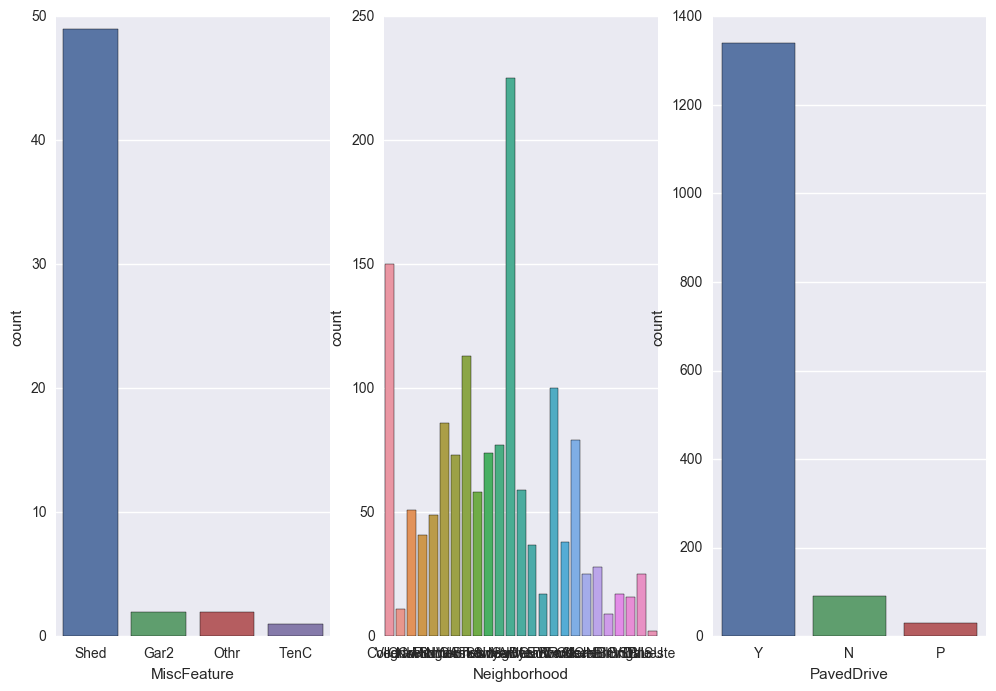

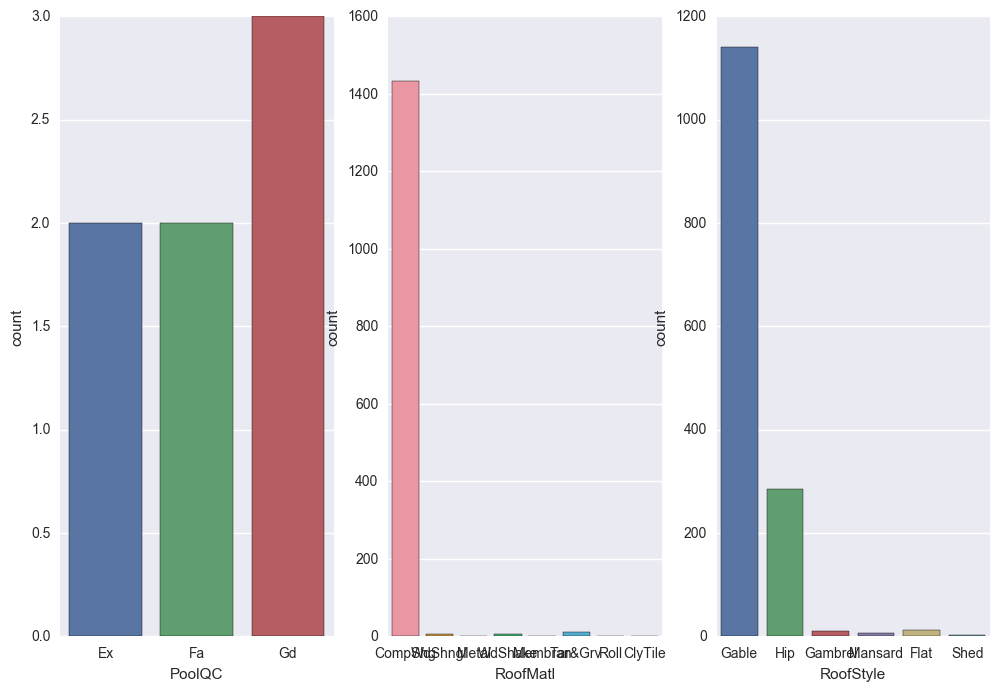

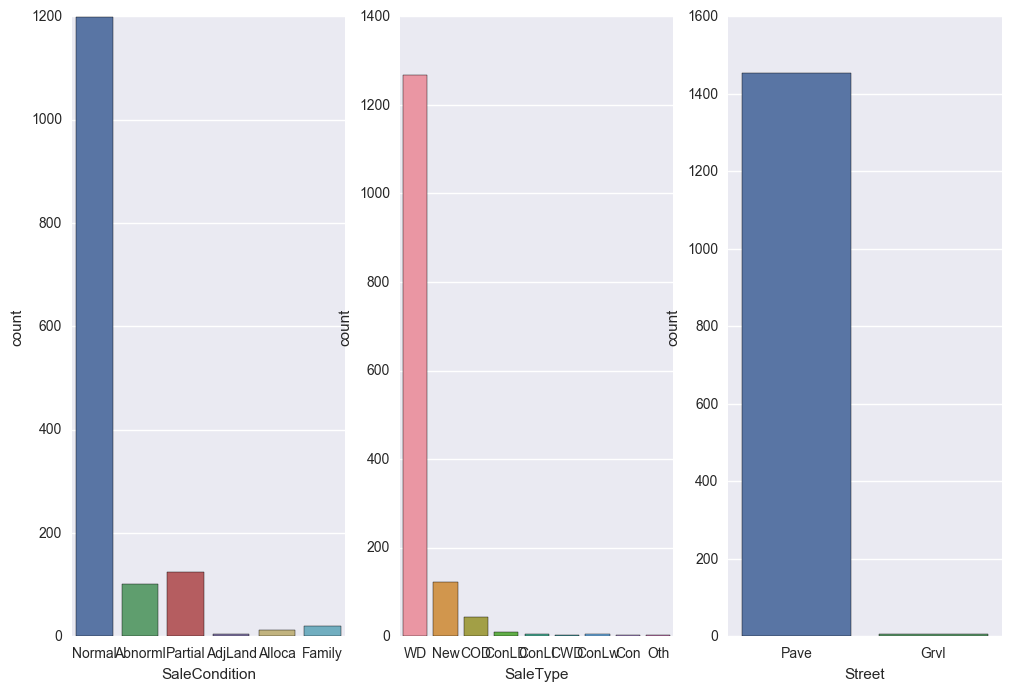

In [10]:
# Visualize Distribution of categorical data
n_col =3
n_row = 14
for i in range(n_row):
    fg,ax = plt.subplots(nrows=1,ncols=n_col,figsize=(9,5))
    for j in range(n_col):
        sns.countplot(x =cat_data.iloc[:, (i*n_col + j)],ax=ax[j])